https://modelcontextprotocol.io/introduction

https://github.com/modelcontextprotocol/python-sdk?tab=readme-ov-file#what-is-mcp

### Model Context Protocol (MCP)
- MCP is an open source protocol that standardizes "how application provide context to LLMs" or "how your LLM applications connect to and work with different tools and data sources"
- Think MCP like a USB port in our laptop whereas data sources and tools are like keyword, mouse, pendrive etc which we can connect to our laptop using USB port which is compatiable to both laptop and external devices.

This is how normal API works: client (UI) hit the https:// url to get the response from server (backend) using REST APIs in JSON format

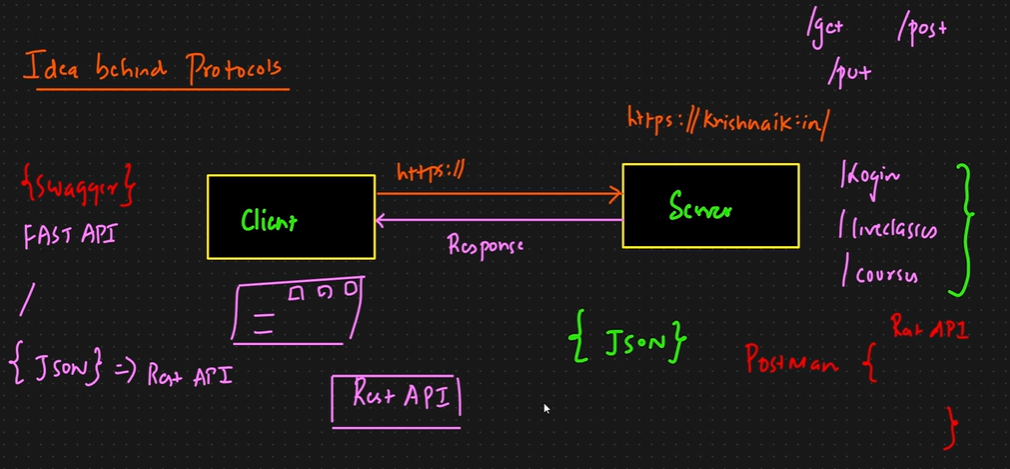

Our generative AI or Agentic AI application is directly connected to 3rd party resources like /websearch, /wikipedia and so on via REST APIs, any changes in the server side (means 3rd party side) occurs based on that we also need to modify our code which is not good approach.

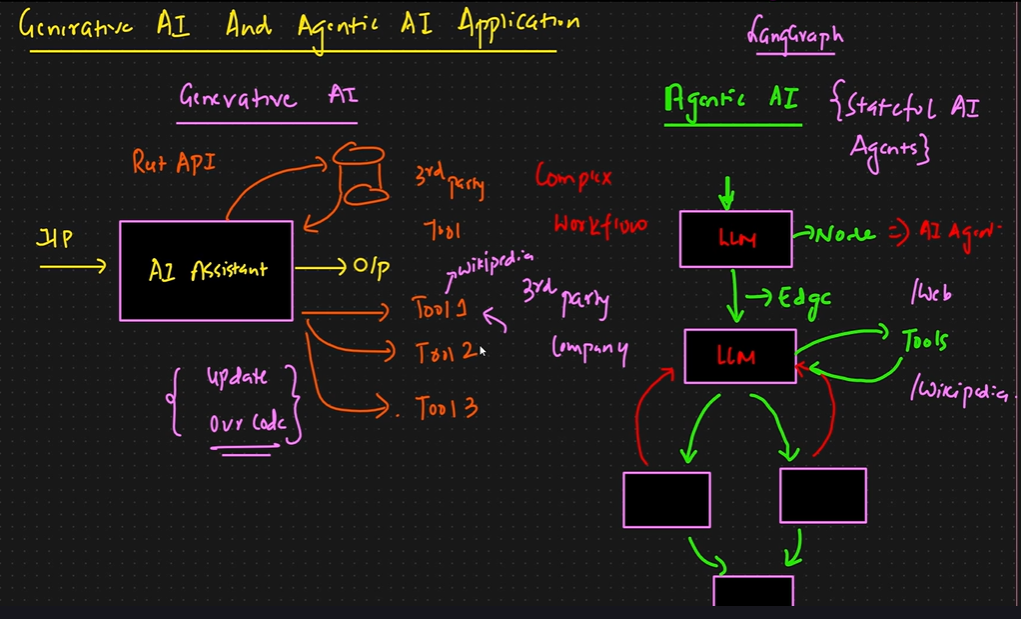

Anthropic come-up with the concept of MCP protocol where both client and server side will follow some standard set of rules like a USB port so we don't need to update our code whenever any changes occur in server side.

Here, AI assistant(LLM) is connected or communicating with 3rd party external service provider using MCP Protocol instead of direct REST APIs and "all the external services are complelety managed by the service providers itself" so we don't need to update our code when any changes occur in 3rd party side.

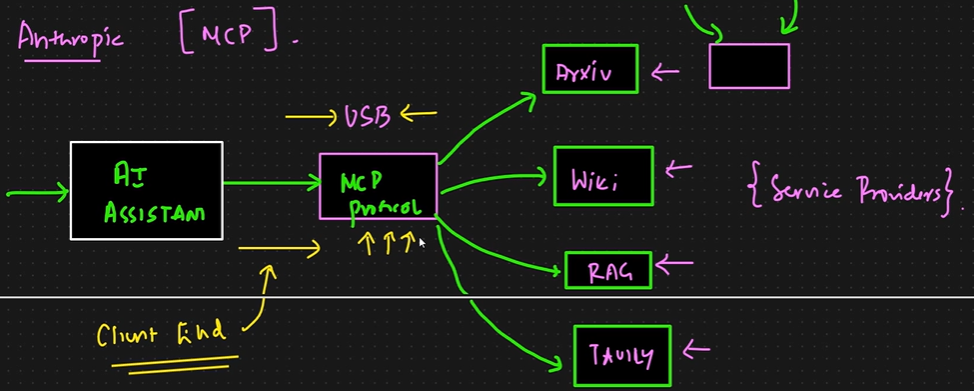

NOTE: Build-in MCP servers for external resources or services are fully managed by the Service Providers

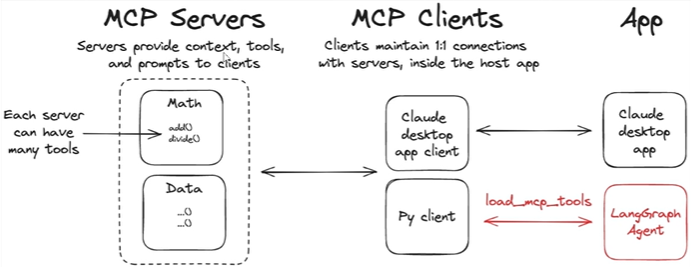

### Components of MCP

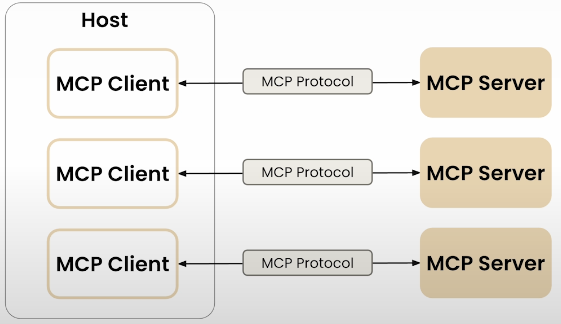

MCP follows a **client-server architecture** where a host application can connect to multiple servers:
- **MCP Host:** IDE, Claude Desktop, Cursor IDE, Application that want to access data through MCP (any frontend)
- **MCP Client:** It will be inside MCP Host, basically python code (mcp_config.json file when using claude desktop or cursor ide) which will be used to connect with MCP Servers. It creates and maintain 1:1 connection with servers.
- **MCP Server:** They are connected to various external services and tools. Lightweight programs that each service provider expose specific capabilities through the standardized Model Context Protocol

NOTE: external services and tools can be local files, databases or external services over internet

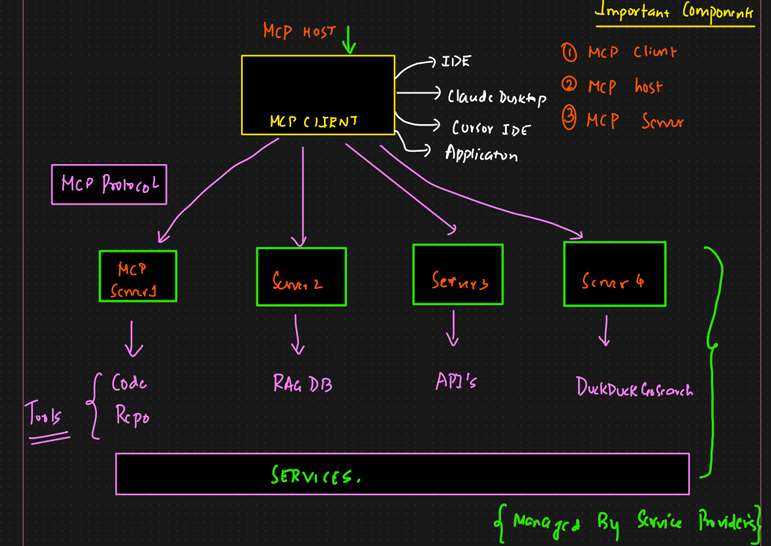

### Communication between the MCP components

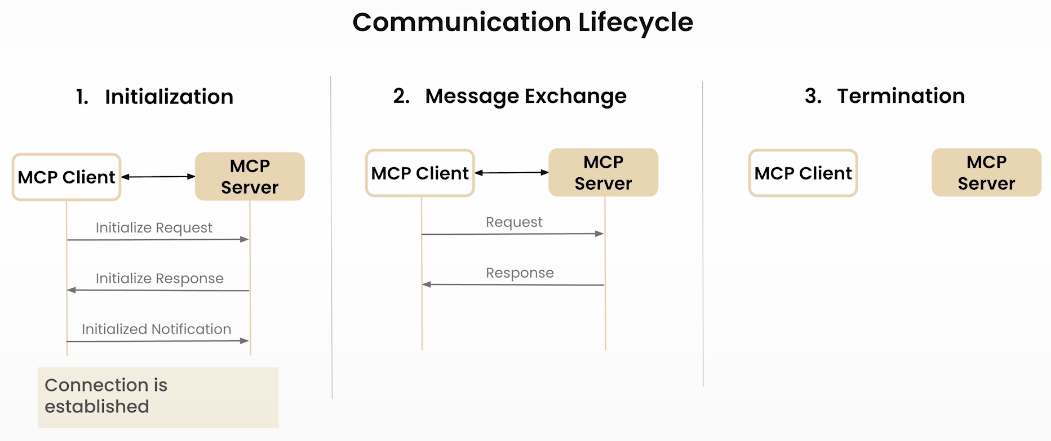

- When input comes to MCP Client, we will make a initial request to MCP server and get the information about all the tools which are connected to MCP server 
- Then will provide the tools information along with the input to LLM and get the response of which tools to use 
- Once MCP Client knows which tools to use, it make the another request to MCP server for that specific tool to use and get the Context
- Then will provide the recevied Context to LLM and based on this Context and input, LLM will provide the final result

NOTE: The ability to require a human in the loop is based on the inetrface that the host develops.

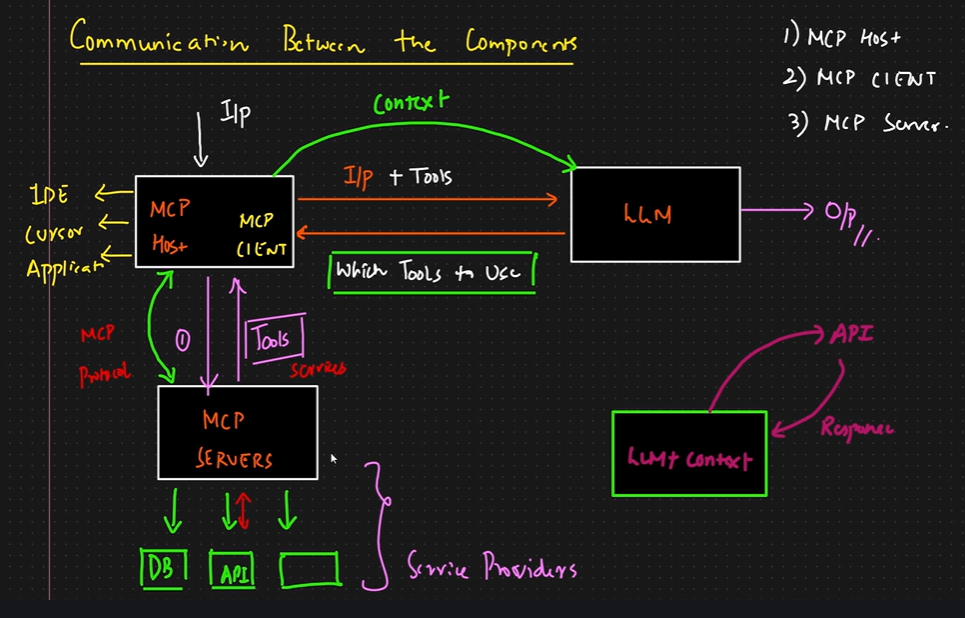

### MCP Architecture

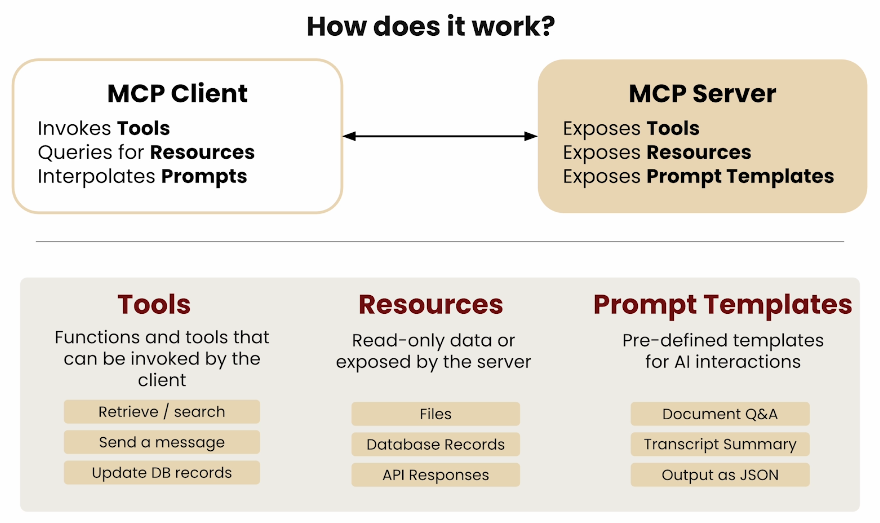

#### Tools
- Functions that can be invoked by the Client. These tools allow for retrieving, searching, sending messages and updating database records. Tools are usually meant for data that might require something like a POST request or some kind of modification.

#### Resources
- Like a GET request and are read-only data or context exposed by the Server. Our application can choose whether to consume or use these resources, but it doesn't necessarily have to bring it into context. Examples of resources can include database records, API responses, files, PDFs, and so on that you may have.
- NOTE: With resources, we don't need tools to fetch the data that we need, the server simply sends the data back to the client and the application chooses to use that data or not.

    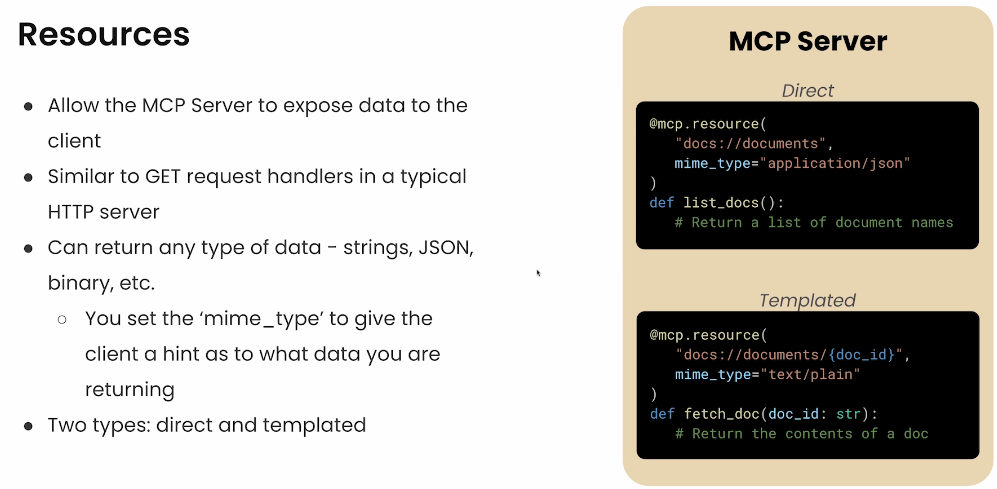

    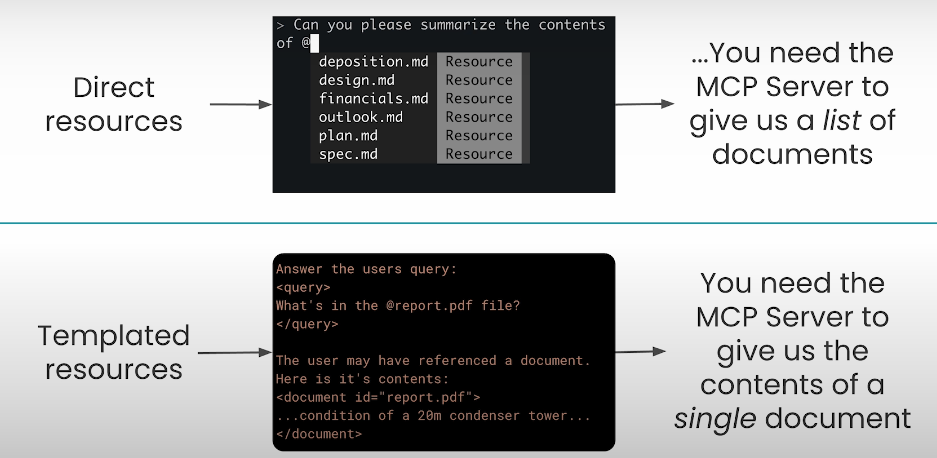

#### Prompt Templates
- Aim to achieve a very reasonable task which is to remove the burden of prompt engineering from the user. We might have an MCP server whose job is to query things in Google Drive and summarize and so on, but the user itself would need to write the prompt necessary to achieve all of those tasks in the most efficient wau possible. Instead of mandating that the user write the entire prompt and figure out the best practices for prompt engineering, prompt templates are pre-defined templates that live on the server that the client can access and feed to the user if they so choose.

    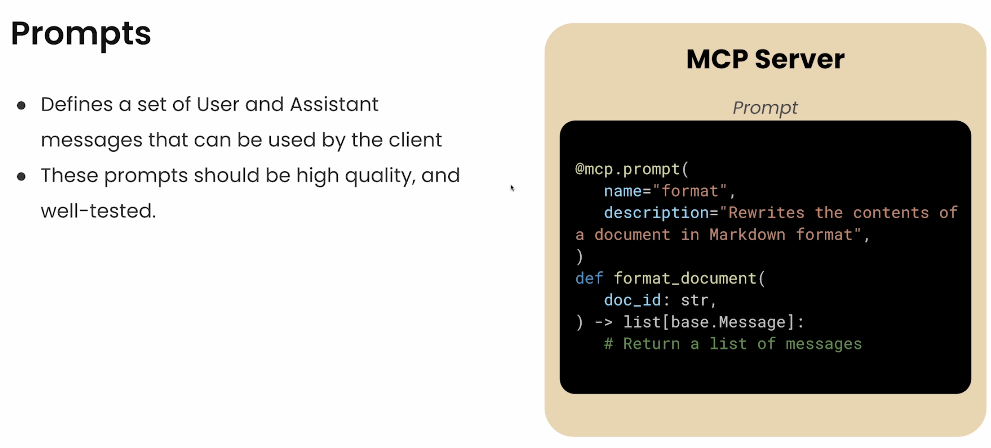

#### MCP Transports
- A transport handles the underlying mechanics of how messages are sent and received between the client and server.
    1. For servers running locally: **stdio** (standard input output)
    
        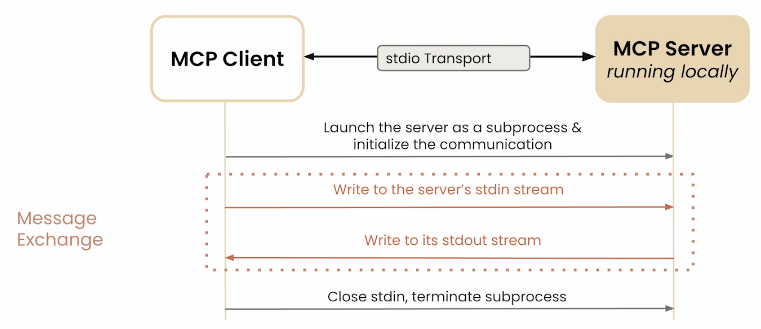
    2. For remote servers:
        - **HTTP + SSE (Server Sent Events)** (from protocol version 2024-11-05)- You need to open up a stateful connection that maintains a back-and-forth that's open
        - **Streamable HTTP** (as of protocol version 2025-03-26)- allows for stateless as well as stateful connections with the ability to opt into Server Sent Events

        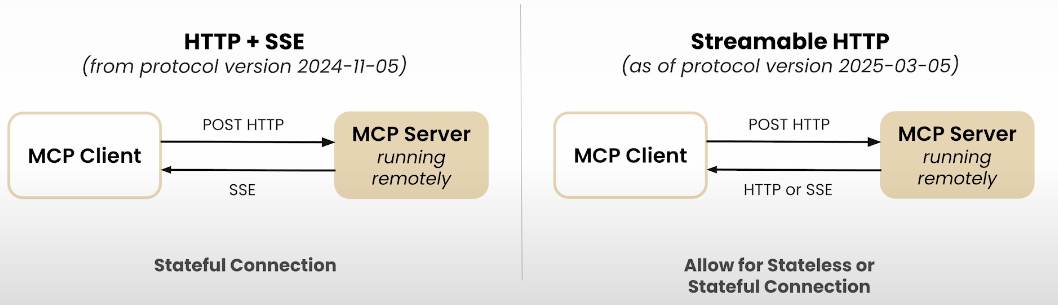

### How to integrate with MCP servers in Claude Desktop

- Download and install the Claude Desktop(its just like a chatbot assitant which provide access to anthropic models)
- Go to file -> Settings -> Developer -> Edit Config (this will opens a json file named 'claude_desktop_config.json' which we need to edit and provide the configuration for MCP servers whom we want to connect)
- Search for "MCP servers" in google or use "https://smithery.ai/" and you will get configuration details in github
- Check fot the command in the configuration of any MCP server and make sure to have that in your system (suppose if the command is npx then make sure you have node.js installed)
- Once you make any changes to config file, make sure to completely close the cluade desktop and restart again to see the changes

    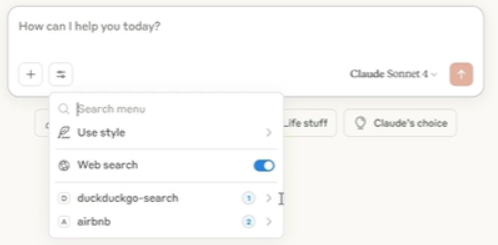

### How to integrate MCP servers in Cursor IDE
- Download and install Cursor IDE(a wrapper on top of VSCode IDE)
- Go to file -> Preferences -> Cursor Settings -> MCP -> Click on 'Add new global MCP server', it will opens 'mcp.json' file in which we can add the configuration of MCP server which we want to use

### Building own Custom basic MCP server

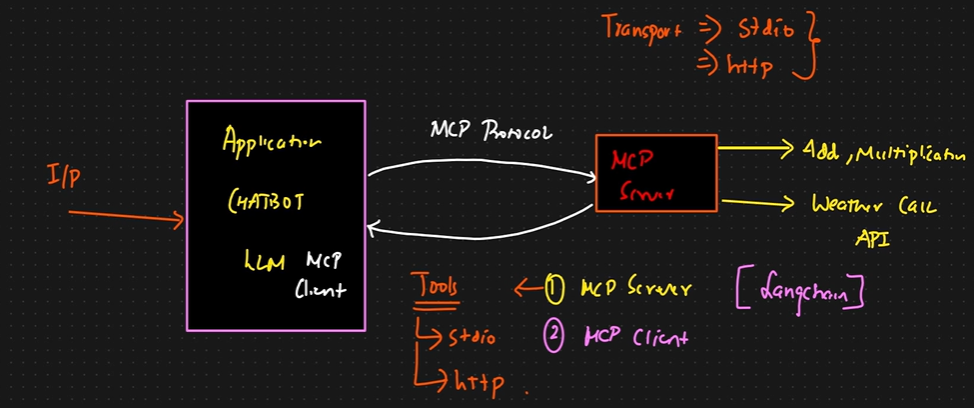

- To communicate with MCP servers, there are different "Transport Protocols" which caned be used like "stdio", "streamable-http"
- In this project, will be using "uv" instead of "pip" which is similar to pip but faster (in practical used pip only)
    - cmd: *uv init*, it will create basic setup of files
    - cmd: *uv venv*, create virtual env named 'venv'
    - cmd: *uv add -r requirement.txt*, install the libraries inside virtual env
    - cmd: *uv add "mcp[cli]"*, it is important for fastmcp library
    cmd: *uv run mcp dev filename.py*, it will start MCP inspector in some port -> if not using uv then use fastapi
    cmd: *uv run mcp install filename.py*, it will automatically add the configurations of your custom server to claude desktop config file
- Create .py file for each servers like mathserver.py, weather.py inside which will define the tools
- Make sure when using 'streamable-http' transport protocol then that server is running and use url 'localhost:8000/mcp' by default if not provided any specific

NOTE: we can also have config.json file in vscode ide, different steps are there using mcp-use library -> learn 

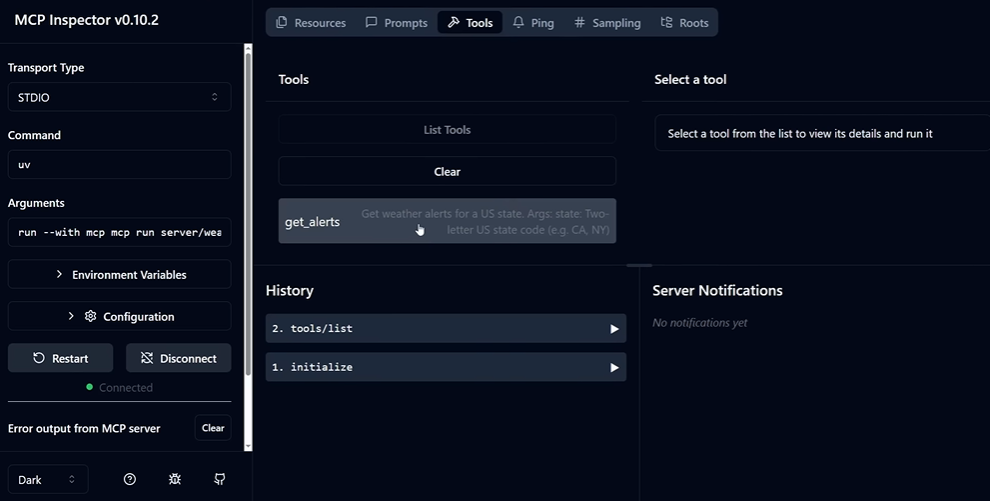